<a href="https://colab.research.google.com/github/fwkhan/CE888/blob/main/lab3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Read Bank Data File

In [2]:
bank_data = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv', delimiter = ";") 
bank_data = bank_data.dropna()

In [3]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Dropping '**Duration**' Column

In [4]:
Class = bank_data['y']
bank_data = bank_data.drop(['duration', 'y'],axis =1)

# Identifying all the categorical features

In [5]:
object_feature_name = []
for feature in bank_data:
  if bank_data[feature].dtypes == 'object':
    print(feature.upper(),' --------',bank_data[feature].unique())
    object_feature_name.append(feature)


JOB  -------- ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
MARITAL  -------- ['married' 'single' 'divorced' 'unknown']
EDUCATION  -------- ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
DEFAULT  -------- ['no' 'unknown' 'yes']
HOUSING  -------- ['no' 'yes' 'unknown']
LOAN  -------- ['no' 'yes' 'unknown']
CONTACT  -------- ['telephone' 'cellular']
MONTH  -------- ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
DAY_OF_WEEK  -------- ['mon' 'tue' 'wed' 'thu' 'fri']
POUTCOME  -------- ['nonexistent' 'failure' 'success']


# Performing one-hot encoding on the categorical features

In [6]:
bank_data = pd.get_dummies(bank_data, columns=object_feature_name)


In [7]:
bank_data

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [8]:
bank_data.shape

(41188, 62)

In [9]:
column_name = bank_data.columns

# Histogram of the label and imbalance in the dataset

no     36548
yes     4640
Name: y, dtype: int64


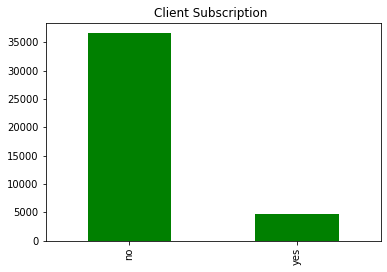

In [10]:
print(Class.value_counts())
Class.value_counts().plot (kind = 'bar', title = 'Client Subscription ', color=["green"])

# Scaling data using MinMaxScaler

In [11]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
scaled_data = scalar.fit_transform(bank_data.values.reshape(-1, len(pd.DataFrame(bank_data).columns)))

In [12]:
scaled_data = pd.DataFrame(scaled_data, columns=column_name)

In [13]:
scaled_data

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.481481,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.493827,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.246914,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.283951,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.481481,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.691358,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41184,0.358025,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41185,0.481481,0.018182,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41186,0.333333,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
Class = pd.DataFrame(Class)

In [15]:
Class

,y
0,no
1,no
2,no
3,no
4,no
...,...
41183,yes
41184,no
41185,no
41186,yes


# Label Encoding Class column

In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Class = le.fit_transform(Class['y'])

In [17]:
Class

array([0, 0, 0, ..., 0, 1, 0])

# Wrapper to perform Train Test Split

In [18]:
def perform_train_test_split(random_state = 1, test_size = 0.25):
  return train_test_split(scaled_data, Class, test_size=test_size,  random_state=random_state, stratify=Class )
   

In [19]:
 random_state = 50
 test_size = 0.2
 X_train, X_test, y_train, y_test = perform_train_test_split(random_state, test_size)

# Checking if Train Test split is Stratified


--- Percentage of class 'yes' is same in both the splits



In [20]:
pd.DataFrame(y_train).value_counts()

0    29238
1     3712
dtype: int64

In [21]:
pd.DataFrame(y_test).value_counts()

0    7310
1     928
dtype: int64

In [22]:
3712/(29238+3712)

0.11265553869499241

In [23]:
928/(7310+928)

0.11264870114105366

# Checking Metrics for valid score options

In [24]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys()) 

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

# Wrapper function to calculate Cross Validation score

In [25]:
def Get_cross_val_score(X_train, y_train, n_estimators = 100, max_depth=None, random_forest_random_state=None):

  rf_clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state = random_forest_random_state)
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
  cross_valScore = cross_val_score(estimator = rf_clf, X = X_train, y = y_train, cv = cv, scoring='f1')
  print("Average cross validation Score: %.2f +/- %.2f" % (cross_valScore.mean(), cross_valScore.std()))
  return rf_clf, cross_valScore

In [26]:
cv_score = []
classifier_name = []

In [27]:
n_estimators=100
max_depth=3
_, rf_cross_valScore = Get_cross_val_score(X_train, y_train, n_estimators, max_depth)
cv_score.append(rf_cross_valScore)
classifier_name.append('Random Forest Classifier')


Average cross validation Score: 0.25 +/- 0.03


# Dummy Classifier

In [28]:
random_state = 50
test_size = 0.2
X_train, X_test, y_train, y_test = perform_train_test_split(random_state, test_size)

dummy_clf = DummyClassifier(strategy='stratified')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
dclf_cross_valScore = cross_val_score(estimator = dummy_clf, X = X_train, y = y_train, cv = cv, scoring='f1')
cv_score.append(dclf_cross_valScore)
classifier_name.append('Dummy Classifier')
print("Average cross validation Score: %.2f +/- %.2f" % (dclf_cross_valScore.mean(), dclf_cross_valScore.std()))

Average cross validation Score: 0.12 +/- 0.03


## Classifier Comparison

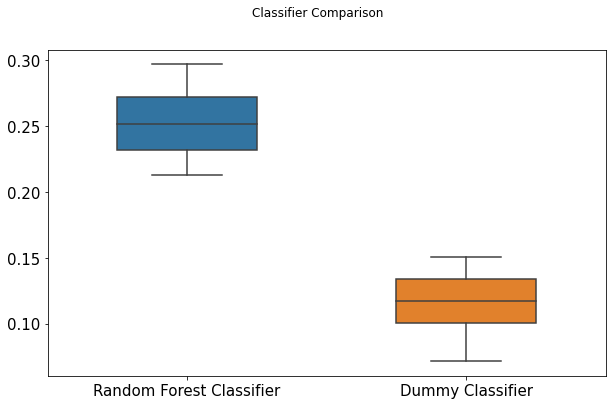

In [29]:
fig = plt.figure(figsize=(10,6)) 
fig.suptitle('Classifier Comparison') 
ax = fig.add_subplot(111) 

sns.boxplot(data=cv_score, width=0.5) 
ax.set_xticklabels(classifier_name)
plt.tick_params(labelsize=15)
# plt.xticks(rotation=90)
plt.show()

# Grid Search

In [30]:
model = RandomForestClassifier()
parameters = {'n_estimators' : [1000, 2000], 'max_depth' : [6,8]}
grid_search = GridSearchCV(estimator = model, param_grid = parameters,
                          cv=cv, return_train_score = False, n_jobs = -1,
                          scoring = 'f1')
grid_search.fit(X_train,y_train)
best_accuracy = grid_search.best_score_

## Best parameter with Grid Search

In [31]:
grid_search.best_params_

{'max_depth': 8, 'n_estimators': 1000}

In [32]:
best_accuracy

0.30321375103456977

## Feature Importance Score and Plot

[ 8  7  2 61  4  6  5  0  3 60 49 52 59 43 50 42  1 44 55 48 53 34 33 31
 10 17 14 56 57 23 54 58 22 28 36 38 45 18 30  9 27 39 41 47 51 25 32 16
 21 46 26 15 13 19 40 12 20 37 11 24 29 35]
Feature ranking:
1. nr.employed (0.172155)
2. euribor3m (0.152011)
3. pdays (0.108120)


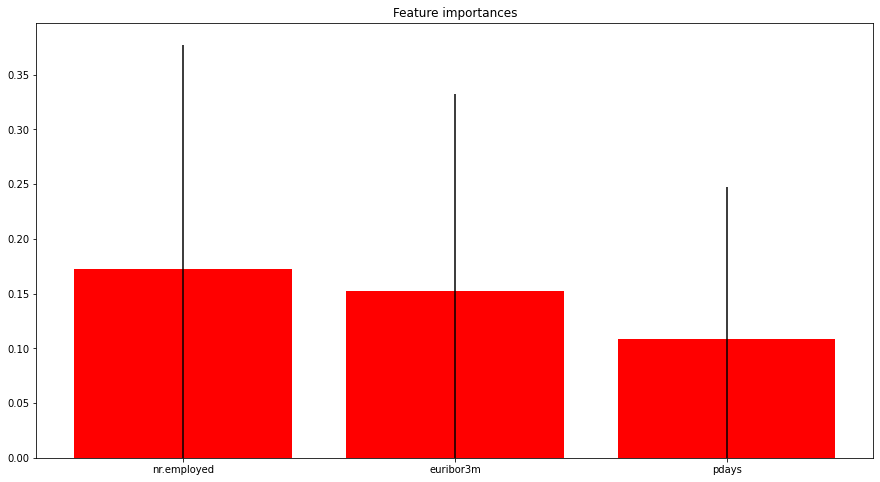

In [35]:
clf = grid_search.best_estimator_
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

# Print the feature ranking
print("Feature ranking:")

for f in range(3):
    print("%d. %s (%f)" % (f + 1, column_name[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(3), importances[indices][:3],
       color="r", yerr=std[indices][:3], align="center")
plt.xticks(range(3), np.array(column_name)[indices][:3])
# plt.xlim([-1, X_train.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(15, 8)

# plt.savefig("importances.pdf", bbox_inches='tight')

# **Quiz**

##Quiz 6

In [36]:
# Q6
random_state = 50
test_size = 0.2
X_train, X_test, y_train, y_test = perform_train_test_split(random_state, test_size)
n_estimators=100
max_depth=3
_, cross_valScore = Get_cross_val_score(X_train, y_train, n_estimators, max_depth)

Average cross validation Score: 0.25 +/- 0.03


##Quiz 7

In [37]:
# Q7
random_state = 50
test_size = 0.2
X_train, X_test, y_train, y_test = perform_train_test_split(random_state, test_size)
n_estimators=100
max_depth=8
_, cross_valScore = Get_cross_val_score(X_train, y_train, n_estimators, max_depth)

Average cross validation Score: 0.30 +/- 0.02


##Quiz 8

In [38]:
# Q8
random_state = 50
test_size = 0.2
X_train, X_test, y_train, y_test = perform_train_test_split(random_state, test_size)
n_estimators=200
max_depth=10
random_forest_random_state = 60
RFC, cross_valScore = Get_cross_val_score(X_train, y_train, n_estimators, max_depth, random_forest_random_state)
RFC.fit(X_train, y_train)

print('Generalization Error:',f1_score(y_test, RFC.predict(X_test)))

Average cross validation Score: 0.33 +/- 0.03
Generalization Error: 0.35742652899126287


##Quiz 9

In [39]:
# Q9
random_state = 50
test_size = 0.2
X_train, X_test, y_train, y_test = perform_train_test_split(random_state, test_size)
n_estimators=200
max_depth=12
random_forest_random_state = 60
RFC, cross_valScore = Get_cross_val_score(X_train, y_train, n_estimators, max_depth, random_forest_random_state)

Average cross validation Score: 0.35 +/- 0.03


In [40]:
RFC.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=60, verbose=0,
                       warm_start=False)

[ 7  8 61  2  4  0  6  5  3  1 59 52 60 49 43 50 42 55 31 38 36 56 23 54
 57 22 44 28 58  9 39 10 14 41 18 30 33 48 27 17 21 25 53 34 32 16 13 26
 15 19 47 51 45 40 12 37 20 11 46 24 29 35]
Feature ranking:
1. euribor3m (0.134903)
2. nr.employed (0.113001)
3. poutcome_success (0.073632)


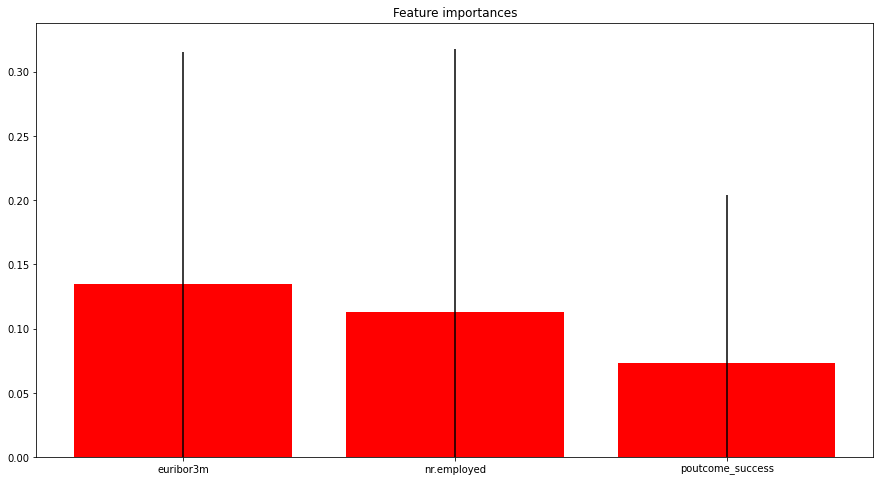

In [42]:
importances = RFC.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

# Print the feature ranking
print("Feature ranking:")

for f in range(3):
    print("%d. %s (%f)" % (f + 1, column_name[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(3), importances[indices][:3],
       color="r", yerr=std[indices][:3], align="center")
plt.xticks(range(3), np.array(column_name)[indices][:3])
# plt.xlim([-1, X_train.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(15, 8)
